# Day 1 使用LeNet-5实现MNIST手写数字识别

### 1.设置GPU

In [4]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpu[0]
    tf.config.experimental.set_memory_growth(gpu0, True)
    tf.config.set_visible_devices([gpu0], "GPU")

### 2.导入数据

In [7]:
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### 3.归一化

In [8]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### 4.可视化图片

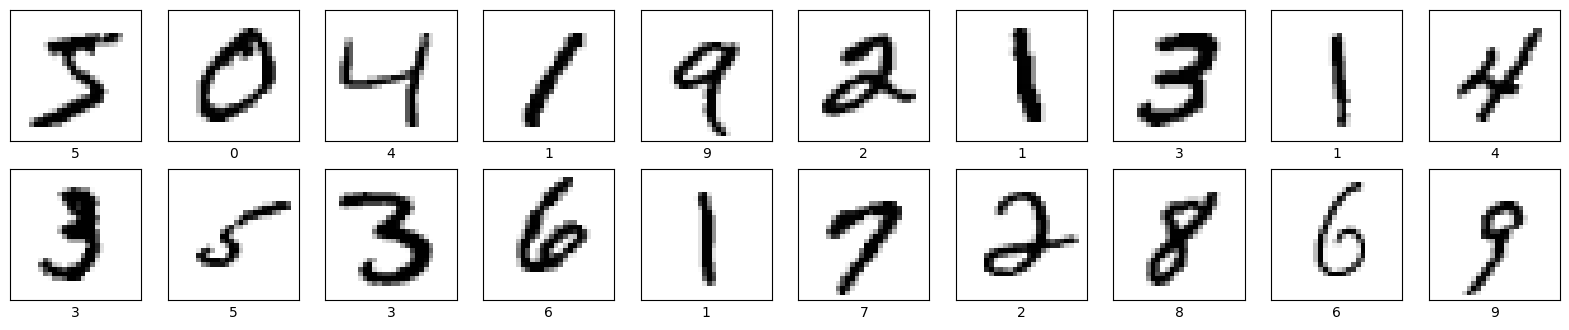

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for i in range(20): 
    
    plt.subplot(5, 10, i+1)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(train_labels[i])
plt.show()

### 5.调整图片格式

In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

### 6.构造CNN网络模型

In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### 7. 编译模型

In [26]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

### 8.训练模型

In [28]:
history = model.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9067 - loss: 0.3103 - val_accuracy: 0.9836 - val_loss: 0.0491
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9842 - loss: 0.0501 - val_accuracy: 0.9862 - val_loss: 0.0452
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9881 - val_loss: 0.0381
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9874 - val_loss: 0.0392
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9901 - val_loss: 0.0298
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9913 - val_loss: 0.0308
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9966 -

### 9. 预测模型

In [31]:
import numpy as np
pre = model.predict(test_images)
pre[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([  6.241111 ,   2.7779014,  28.530071 , -13.002829 ,  -6.707764 ,
       -23.738731 ,   2.6450343, -20.96213  , -10.379917 , -16.446318 ],
      dtype=float32)

In [35]:
predicted_labels = np.argmax(pre[1])
predicted_labels

2

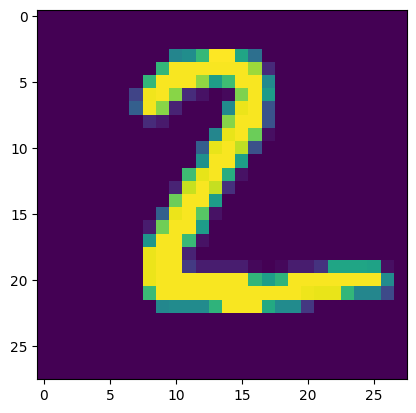

In [69]:
#test_images[1]     #输出测试图片
plt.imshow(test_images[1])
#print (type(test_images[1]))
#print(len(test_images[1][0]))

### 10.参考链接

1.https://mp.weixin.qq.com/s/TR13H-gTqlWKTzIhPATsaw

### 11.使用一张手写数字图片验证模型的泛化性

In [72]:
from PIL import Image
    
img = Image.open("my_digit.png").convert("L") #读取自己画的图片

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


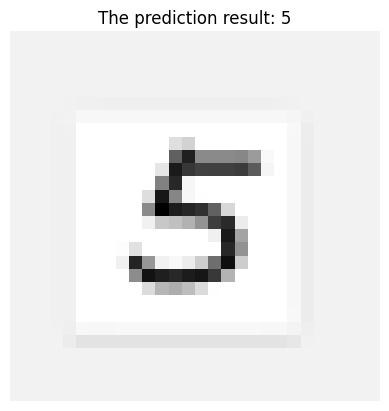

In [73]:
img = img.resize((28, 28)) #输入尺寸改成 28x28
img_array = np.array(img) #转成numpy数组

img_array = img_array / 255.0 #归一化处理
img_input = img_array.reshape(1, 28, 28, 1) #扩展维度，适应模型输入

#模型预测
prediction = model.predict(img_input) 
predicted_digit = np.argmax(prediction)

#显示结果
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.title(f"The prediction result: {predicted_digit}")
plt.show()